In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Parameters
num_rows = 100000  # 1 lakh rows
start_date = datetime(2020, 1, 1)

# Generate datetime series (minute-level simulation)
timestamps = [start_date + timedelta(minutes=i) for i in range(num_rows)]

# Generate OHLCV using random walk with volatility clustering
prices = [100]  # start price
for i in range(1, num_rows):
    drift = 0.0002
    volatility = np.random.normal(0, 0.01)
    prices.append(prices[-1] * (1 + drift + volatility))

open_price = np.array(prices)
high_price = open_price * (1 + np.random.uniform(0.001, 0.02, num_rows))
low_price = open_price * (1 - np.random.uniform(0.001, 0.02, num_rows))
close_price = open_price * (1 + np.random.uniform(-0.01, 0.01, num_rows))
volume = np.random.randint(100, 10000, num_rows)

# Fraudulent patterns injection
fraud_flags = np.zeros(num_rows)

# Pump and Dump events
for _ in range(200):
    idx = random.randint(1000, num_rows-1000)
    volume[idx:idx+10] *= 5  # sudden spike
    close_price[idx:idx+10] *= 1.2
    fraud_flags[idx:idx+10] = 1

# Insider trading (sudden pre-earnings jumps)
for _ in range(150):
    idx = random.randint(500, num_rows-500)
    close_price[idx:idx+5] *= 1.15
    fraud_flags[idx:idx+5] = 1

# Fake news headlines (anomalous text)
news = []
headlines = [
    "Company announces record profits",
    "Rumor: Merger with Tesla",
    "CEO resigns unexpectedly",
    "Regulatory investigation launched",
    "No significant updates today",
    "Market reacts to inflation data",
    "Fake pump: New breakthrough AI launch",
    "Company secures billion-dollar contract",
]
for i in range(num_rows):
    if fraud_flags[i] == 1:
        news.append(random.choice(headlines[1:4] + [headlines[6]]))  # anomaly-related
    else:
        news.append(random.choice(headlines))

# Final DataFrame
df = pd.DataFrame({
    "timestamp": timestamps,
    "open": open_price,
    "high": high_price,
    "low": low_price,
    "close": close_price,
    "volume": volume,
    "fraud_flag": fraud_flags,
    "news_headline": news
})

# Save dataset
file_path = "/content/synthetic_fraud_stock_dataset.csv"
df.to_csv(file_path, index=False)



# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Load the synthetic dataset
file_path = "/content/synthetic_fraud_stock_dataset.csv"  # upload via Colab
df = pd.read_csv(file_path)

# Preview dataset
print(df.head())
print(df.info())


             timestamp        open        high         low       close  \
0  2020-01-01 00:00:00  100.000000  101.493313   98.946299   99.613426   
1  2020-01-01 00:01:00   99.761200  101.120239   99.365789   99.286356   
2  2020-01-01 00:02:00   99.958322  101.738362   99.765788   99.441206   
3  2020-01-01 00:03:00  101.078957  101.814234   99.328570  101.373520   
4  2020-01-01 00:04:00  101.385959  101.729651  100.960647  101.631038   

   volume  fraud_flag                            news_headline  
0    9011         0.0                 CEO resigns unexpectedly  
1    9246         0.0          Market reacts to inflation data  
2    8680         0.0                 Rumor: Merger with Tesla  
3    7064         0.0  Company secures billion-dollar contract  
4    3982         0.0  Company secures billion-dollar contract  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------

Dataset Shape after cleaning: (100000, 8)

Missing Values:
 timestamp        0
open             0
high             0
low              0
close            0
volume           0
fraud_flag       0
news_headline    0
dtype: int64

Fraud Label Distribution:
 fraud_flag
0.0    0.97275
1.0    0.02725
Name: proportion, dtype: float64


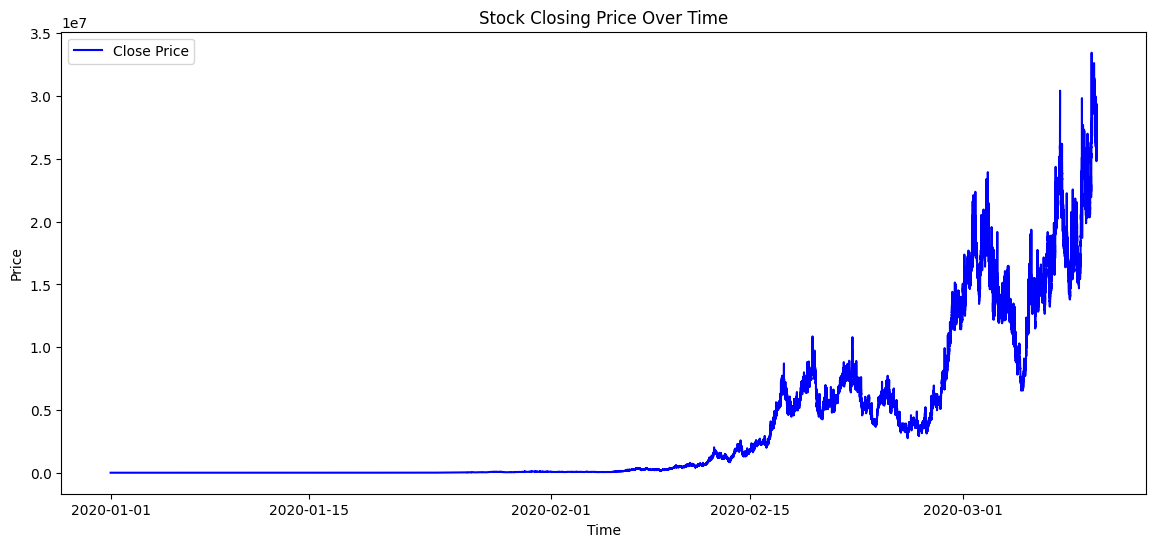

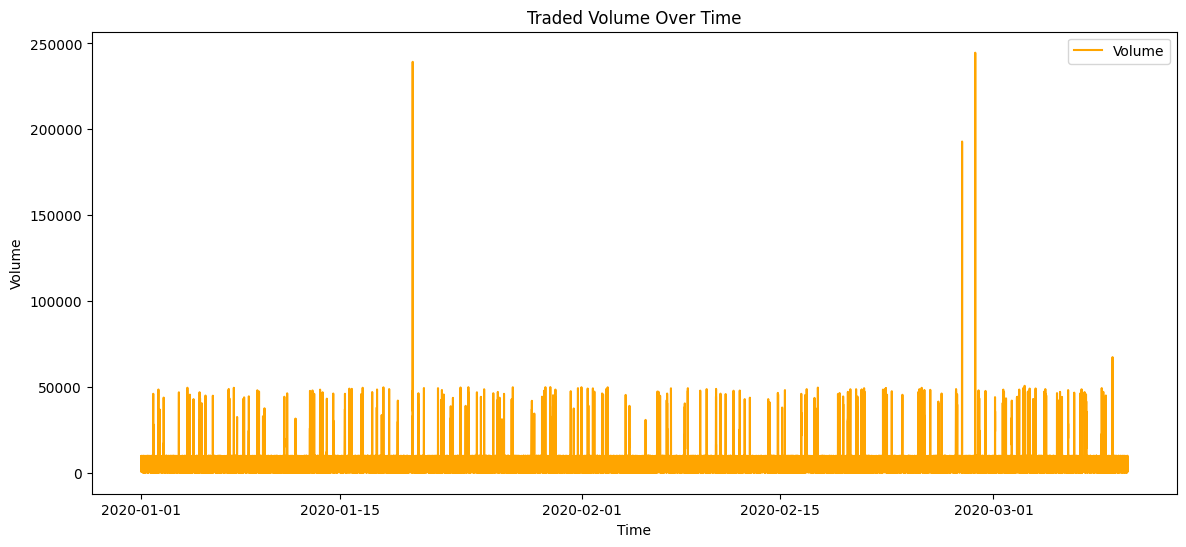

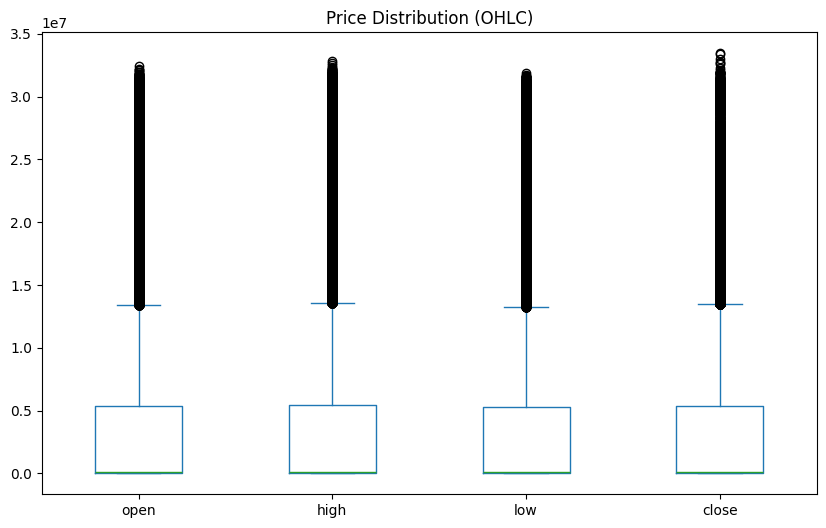

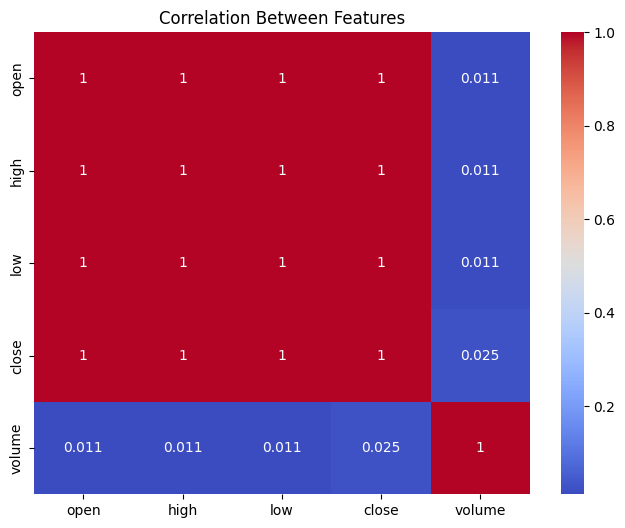

/tmp/ipython-input-3708690402.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud_flag', data=df, palette="Set2")


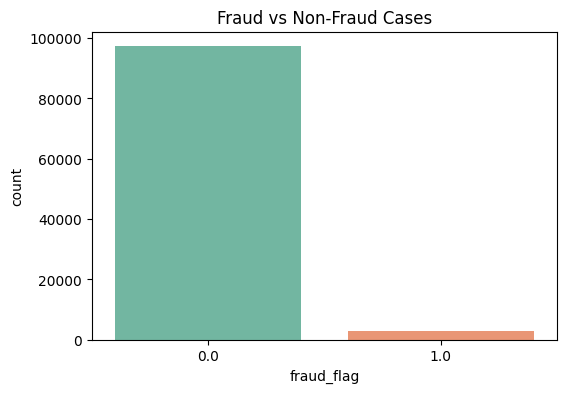

/tmp/ipython-input-3708690402.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="fraud_flag", y="close", data=df, palette="Set1")


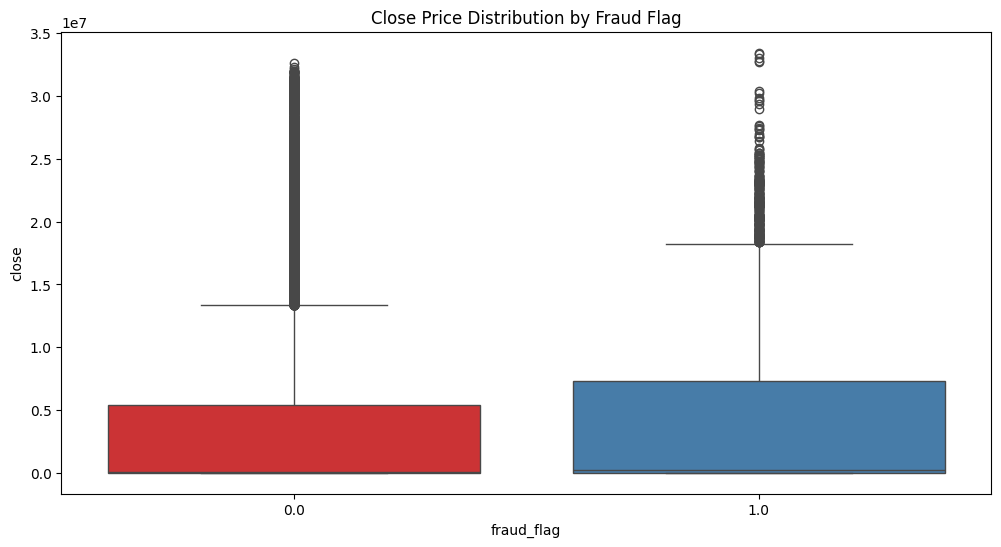

/tmp/ipython-input-3708690402.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="fraud_flag", y="volume", data=df, palette="Set1")


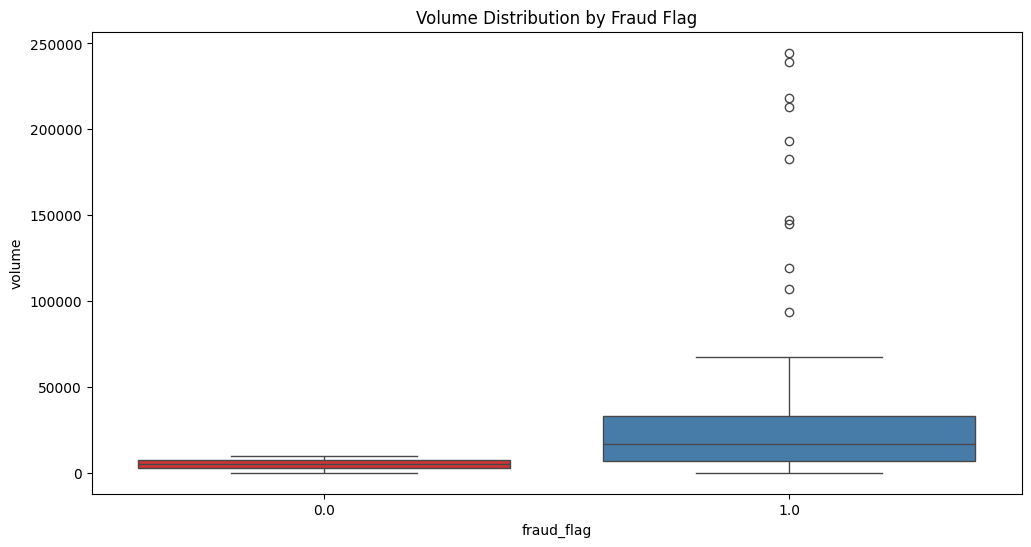

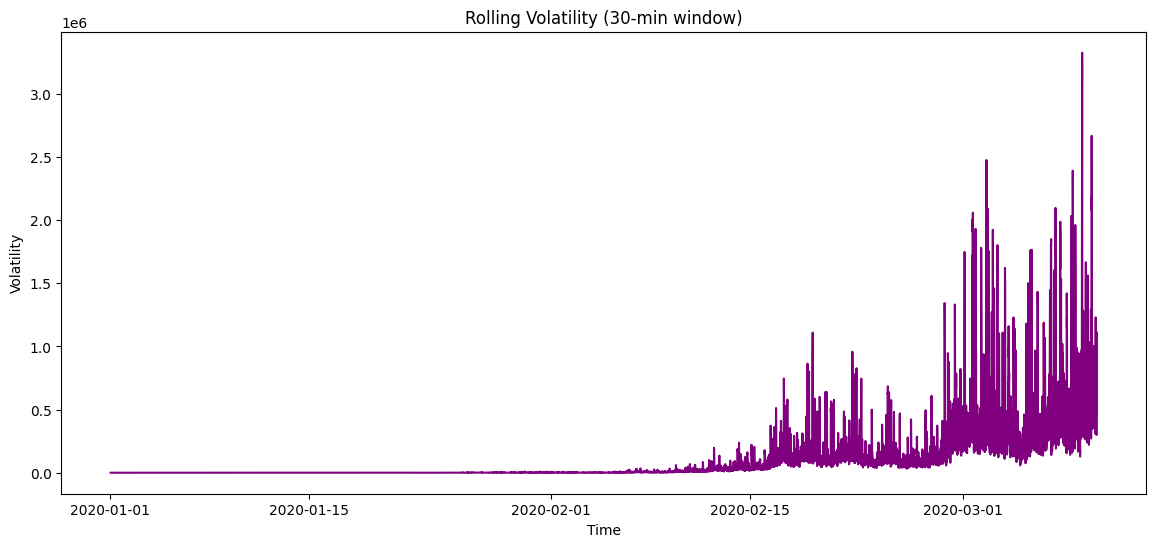

In [2]:
# --- Step 1: Data Cleaning ---

# Forward-fill missing values safely
df = df.ffill()

# Convert timestamp safely (invalid -> NaT)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop invalid timestamp rows
df = df.dropna(subset=['timestamp']).reset_index(drop=True)

print("Dataset Shape after cleaning:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFraud Label Distribution:\n", df['fraud_flag'].value_counts(normalize=True))

# --- Step 2: Exploratory Data Analysis (EDA) ---

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Closing Price over Time
plt.figure(figsize=(14,6))
plt.plot(df['timestamp'], df['close'], label="Close Price", color="blue")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# 2. Volume over Time
plt.figure(figsize=(14,6))
plt.plot(df['timestamp'], df['volume'], label="Volume", color="orange")
plt.title("Traded Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.legend()
plt.show()

# 3. OHLC Boxplot
df[['open','high','low','close']].plot(kind='box', figsize=(10,6))
plt.title("Price Distribution (OHLC)")
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['open','high','low','close','volume']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()

# 5. Fraud vs Non-Fraud Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='fraud_flag', data=df, palette="Set2")
plt.title("Fraud vs Non-Fraud Cases")
plt.show()

# 6. Close Price Distribution by Fraud Flag
plt.figure(figsize=(12,6))
sns.boxplot(x="fraud_flag", y="close", data=df, palette="Set1")
plt.title("Close Price Distribution by Fraud Flag")
plt.show()

# 7. Volume Distribution by Fraud Flag
plt.figure(figsize=(12,6))
sns.boxplot(x="fraud_flag", y="volume", data=df, palette="Set1")
plt.title("Volume Distribution by Fraud Flag")
plt.show()

# 8. Rolling Volatility (30-min window std dev of close price)
df['rolling_volatility'] = df['close'].rolling(window=30).std()

plt.figure(figsize=(14,6))
plt.plot(df['timestamp'], df['rolling_volatility'], color="purple")
plt.title("Rolling Volatility (30-min window)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.show()


In [3]:
# --- Step 3: Feature Engineering ---

# 1. Volume Z-Score (detect spikes)
df['volume_zscore'] = (df['volume'] - df['volume'].mean()) / df['volume'].std()

# 2. Price Gap % (compare open with previous close)
df['prev_close'] = df['close'].shift(1)
df['price_gap_pct'] = (df['open'] - df['prev_close']) / df['prev_close']

# 3. Intraday Volatility (True Range)
df['true_range'] = df['high'] - df['low']

# 4. Rolling Volatility (30 periods)
df['rolling_volatility'] = df['close'].rolling(window=30).std()

# 5. Circuit Breaker Flag (10% threshold move from prev close)
df['circuit_breaker'] = np.where(
    abs((df['close'] - df['prev_close']) / df['prev_close']) > 0.10, 1, 0
)

# Drop initial NaNs from shift/rolling
df = df.dropna().reset_index(drop=True)

# --- Quick Check ---
print(df[['volume','volume_zscore','price_gap_pct','true_range','rolling_volatility','circuit_breaker']].head(10))


   volume  volume_zscore  price_gap_pct  true_range  rolling_volatility  \
0    8477       0.618589      -0.004537    1.576939            4.720169   
1    3960      -0.313393       0.005205    2.050101            4.703963   
2    3362      -0.436777      -0.009050    2.283359            4.687563   
3    1085      -0.906585      -0.006230    2.924013            4.637517   
4    9871       0.906209      -0.000763    2.282987            4.481845   
5    7871       0.493554       0.011541    2.902910            4.212225   
6    4206      -0.262636      -0.021657    2.053261            3.981903   
7    1087      -0.906172      -0.031273    1.955831            3.582741   
8    5790       0.064187       0.005119    0.341312            3.274695   
9    9329       0.794380      -0.000952    1.826053            3.075374   

   circuit_breaker  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                0  
7     

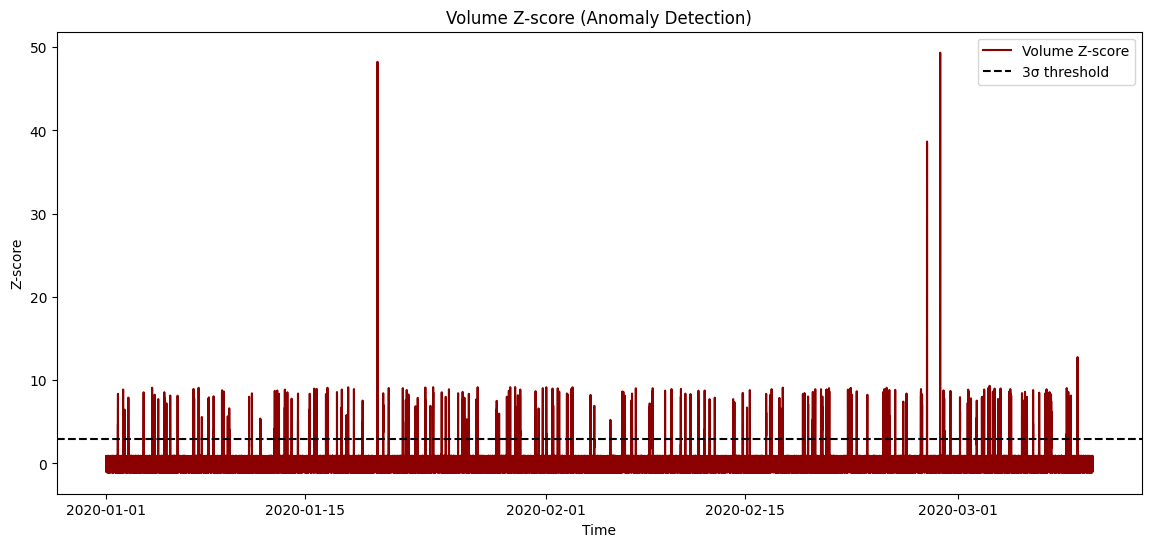

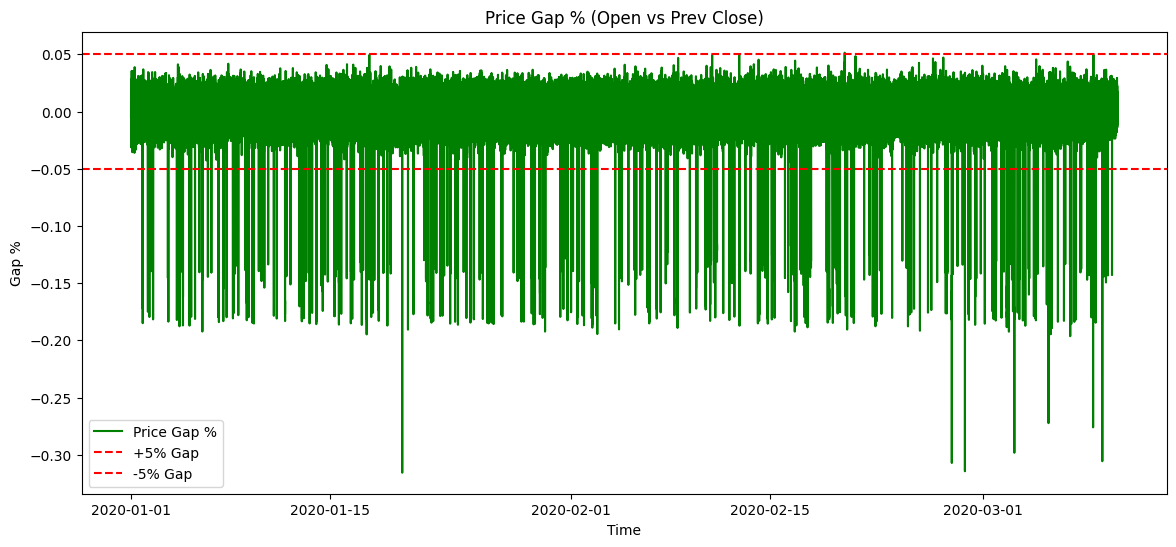

In [4]:
# Plot Volume Z-score
plt.figure(figsize=(14,6))
plt.plot(df['timestamp'], df['volume_zscore'], label="Volume Z-score", color="darkred")
plt.axhline(3, color='black', linestyle='--', label="3σ threshold")
plt.title("Volume Z-score (Anomaly Detection)")
plt.xlabel("Time")
plt.ylabel("Z-score")
plt.legend()
plt.show()

# Plot Price Gap %
plt.figure(figsize=(14,6))
plt.plot(df['timestamp'], df['price_gap_pct'], label="Price Gap %", color="green")
plt.title("Price Gap % (Open vs Prev Close)")
plt.xlabel("Time")
plt.ylabel("Gap %")
plt.axhline(0.05, color='red', linestyle='--', label="+5% Gap")
plt.axhline(-0.05, color='red', linestyle='--', label="-5% Gap")
plt.legend()
plt.show()


Train shape: (79976, 10) Test shape: (19995, 10)
Train fraud rate: 0.02622036610983295 Test fraud rate: 0.03140785196299075

Isolation Forest — Test Report (iso.predict):
              precision    recall  f1-score   support

           0     0.9957    0.2539    0.4047     19367
           1     0.0403    0.9666    0.0774       628

    accuracy                         0.2763     19995
   macro avg     0.5180    0.6102    0.2410     19995
weighted avg     0.9657    0.2763    0.3944     19995

[0]	train-aucpr:0.97414	test-aucpr:0.97182
[50]	train-aucpr:0.99924	test-aucpr:0.99373
[100]	train-aucpr:0.99951	test-aucpr:0.99600
[150]	train-aucpr:0.99996	test-aucpr:0.99707
[200]	train-aucpr:0.99999	test-aucpr:0.99804
[250]	train-aucpr:1.00000	test-aucpr:0.99803
[263]	train-aucpr:1.00000	test-aucpr:0.99806

XGBoost Average Precision (AP): 0.9981
Best threshold (F1): 0.9603459

XGBoost — Test classification report:
              precision    recall  f1-score   support

           0     0.9997  

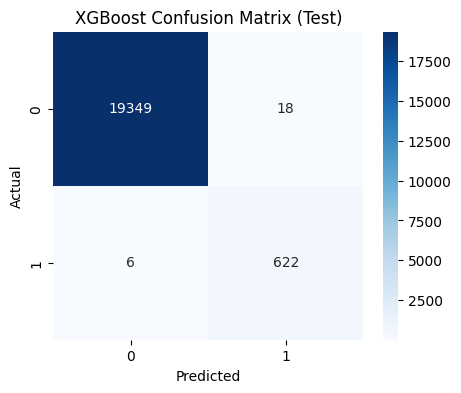

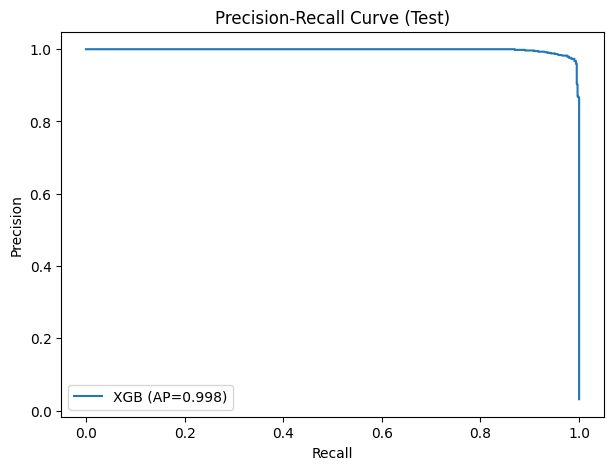

/tmp/ipython-input-2894862013.py:146: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, shap_sample, plot_type="bar", show=True)


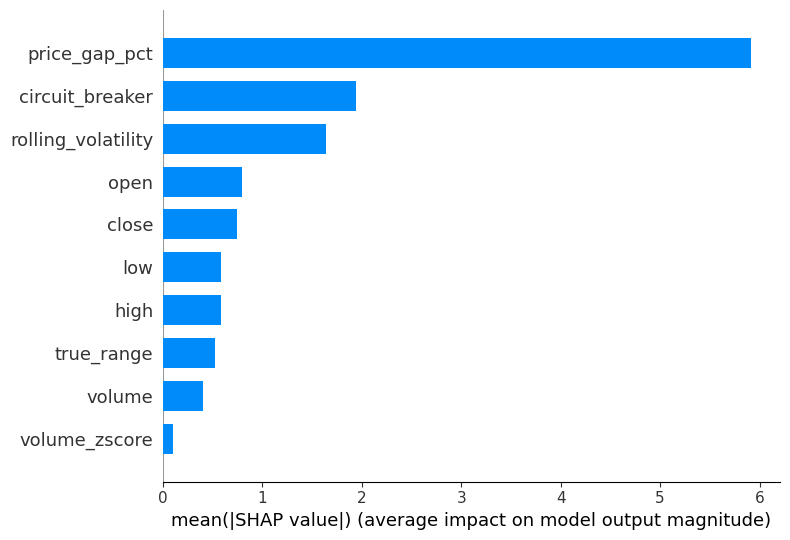

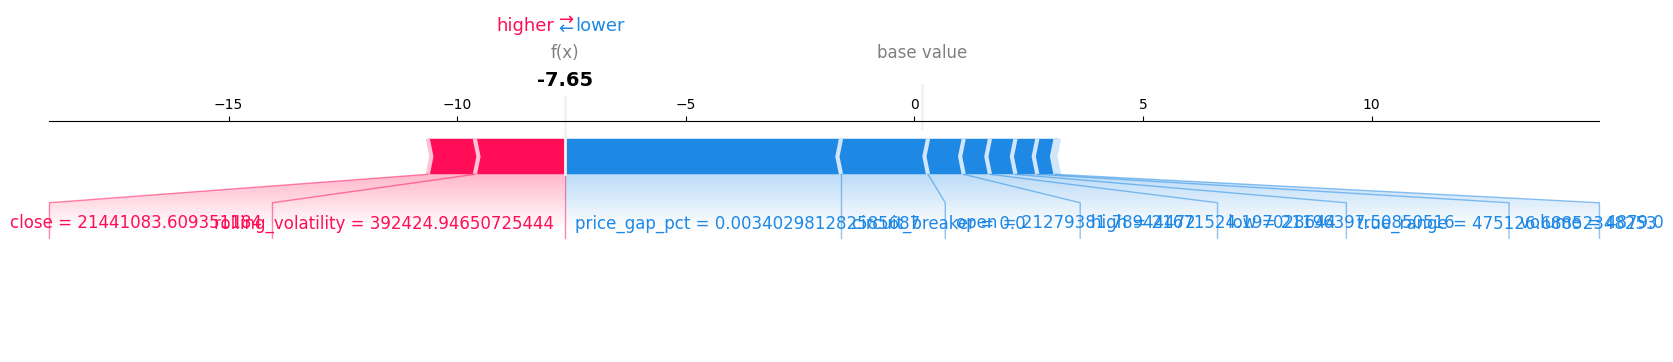


Top Alerts:
                 timestamp          open          high           low  \
83191 2020-02-27 19:00:00  4.214559e+06  4.259274e+06  4.149187e+06   
98446 2020-03-09 09:15:00  2.058936e+07  2.091128e+07  2.032244e+07   
89532 2020-03-03 04:41:00  1.232708e+07  1.250174e+07  1.225640e+07   
84526 2020-02-28 17:15:00  6.765171e+06  6.839233e+06  6.665747e+06   
91630 2020-03-04 15:39:00  1.099012e+07  1.113927e+07  1.078474e+07   
87366 2020-03-01 16:35:00  1.746378e+07  1.775997e+07  1.712624e+07   
89859 2020-03-03 10:08:00  1.544845e+07  1.556695e+07  1.524079e+07   
89523 2020-03-03 04:32:00  1.249413e+07  1.270111e+07  1.234809e+07   
95194 2020-03-07 03:03:00  1.420893e+07  1.444656e+07  1.411186e+07   
90637 2020-03-03 23:06:00  1.287081e+07  1.303971e+07  1.268044e+07   
90388 2020-03-03 18:57:00  1.234914e+07  1.255521e+07  1.220836e+07   
84520 2020-02-28 17:09:00  6.675542e+06  6.726691e+06  6.652543e+06   
94559 2020-03-06 16:28:00  1.372077e+07  1.381159e+07  1.360573

In [5]:
# --- Step 4: Model Training, Evaluation & Explainability ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_recall_curve,
    average_precision_score
)
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
import shap
import joblib

# Ensure reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# ---------------- Data Prep ----------------
feature_cols = [
    'open','high','low','close','volume',
    'volume_zscore','price_gap_pct','true_range','rolling_volatility','circuit_breaker'
]

# Convert labels to int
df['fraud_flag'] = df['fraud_flag'].astype(int)

# Sort by time (important for time-series split)
df = df.sort_values('timestamp').reset_index(drop=True)

# Train/test split (80/20, time-based to avoid leakage)
split_index = int(0.8 * len(df))
train_df = df.iloc[:split_index].copy()
test_df  = df.iloc[split_index:].copy()

X_train = train_df[feature_cols].fillna(0)
y_train = train_df['fraud_flag']
X_test  = test_df[feature_cols].fillna(0)
y_test  = test_df['fraud_flag']

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train fraud rate:", y_train.mean(), "Test fraud rate:", y_test.mean())

# ---------------- 1) Isolation Forest (unsupervised) ----------------
iso = IsolationForest(
    n_estimators=200,
    contamination=y_train.mean(),   # use fraud rate as contamination guess
    random_state=RANDOM_STATE
)

iso.fit(X_train)

# Decision function scores (higher = more normal → we invert)
train_iso_score = -iso.decision_function(X_train)
test_iso_score  = -iso.decision_function(X_test)

train_df['iso_score'] = train_iso_score
test_df['iso_score']  = test_iso_score

# Binary predictions (using built-in predict: -1 = anomaly, 1 = normal)
train_df['iso_pred'] = (iso.predict(X_train) == -1).astype(int)
test_df['iso_pred']  = (iso.predict(X_test) == -1).astype(int)

print("\nIsolation Forest — Test Report (iso.predict):")
print(classification_report(y_test, test_df['iso_pred'], digits=4))

# ---------------- 2) XGBoost (supervised) ----------------
# Handle class imbalance with scale_pos_weight
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = (neg / pos) if pos > 0 else 1.0

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test, label=y_test)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',      # better for imbalance
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': RANDOM_STATE,
    'scale_pos_weight': scale_pos_weight
}

bst = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=500,
    early_stopping_rounds=30,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    verbose_eval=50
)

# Predictions
train_df['xgb_prob'] = bst.predict(dtrain)
test_df['xgb_prob']  = bst.predict(dtest)

# Evaluate with PR curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, test_df['xgb_prob'])
ap = average_precision_score(y_test, test_df['xgb_prob'])
print("\nXGBoost Average Precision (AP):", round(ap,4))

# Find threshold that maximizes F1
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-12)
best_ix = np.nanargmax(f1_scores)
best_threshold = pr_thresholds[best_ix-1] if best_ix>0 and len(pr_thresholds)>0 else 0.5
print("Best threshold (F1):", best_threshold)

test_df['xgb_pred'] = (test_df['xgb_prob'] >= best_threshold).astype(int)

print("\nXGBoost — Test classification report:")
print(classification_report(y_test, test_df['xgb_pred'], digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, test_df['xgb_pred'])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'XGB (AP={ap:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.legend()
plt.show()

# ---------------- 3) Explainability with SHAP ----------------
explainer = shap.TreeExplainer(bst)

# Take sample for SHAP (faster)
shap_sample = X_test.sample(min(500, len(X_test)), random_state=RANDOM_STATE)
shap_vals = explainer.shap_values(shap_sample)

# SHAP summary plot (global importance)
shap.summary_plot(shap_vals, shap_sample, plot_type="bar", show=True)

# Example explanation for one row
row = shap_sample.iloc[[0]]
shap_val_row = explainer.shap_values(row)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_val_row, row, matplotlib=True)

# ---------------- 4) Composite Risk Score ----------------
scaler = MinMaxScaler()

test_df['iso_score_scaled'] = scaler.fit_transform(test_df[['iso_score']])
test_df['xgb_prob_scaled'] = scaler.fit_transform(test_df[['xgb_prob']])
test_df['volume_zscore_scaled'] = scaler.fit_transform(test_df[['volume_zscore']])
test_df['rolling_vol_scaled'] = scaler.fit_transform(test_df[['rolling_volatility']])

# Weighted composite risk score
test_df['composite_risk_score'] = (
      0.50 * test_df['xgb_prob_scaled']
    + 0.25 * test_df['iso_score_scaled']
    + 0.15 * test_df['volume_zscore_scaled']
    + 0.10 * test_df['circuit_breaker']
)

def risk_bucket(x):
    if x >= 0.7: return 'High'
    if x >= 0.4: return 'Medium'
    return 'Low'

test_df['risk_bucket'] = test_df['composite_risk_score'].apply(risk_bucket)

# Show top alerts
display_cols = ['timestamp','open','high','low','close','volume','fraud_flag',
                'iso_score','xgb_prob','composite_risk_score','risk_bucket','news_headline']

top_alerts = test_df.sort_values('composite_risk_score', ascending=False).head(15)
print("\nTop Alerts:\n", top_alerts[display_cols])

# ---------------- 5) Save Models ----------------
joblib.dump(iso, 'isolation_forest_model.joblib')
bst.save_model('xgboost_model.json')
joblib.dump(scaler, 'feature_scaler.joblib')

print("\nModels saved: isolation_forest_model.joblib, xgboost_model.json, feature_scaler.joblib")


In [6]:
# --- Step 5: Sentiment Analysis on News Headlines (DistilBERT) ---

from transformers import pipeline

# Load Hugging Face sentiment pipeline (DistilBERT is the default)
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply to a sample first (to test)
print(sentiment_pipeline("CEO resigns unexpectedly"))

# Apply to all news headlines (limit length if needed)
df['sentiment'] = df['news_headline'].astype(str).apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])
df['sentiment_score'] = df['news_headline'].astype(str).apply(lambda x: sentiment_pipeline(x[:512])[0]['score'])

# Convert sentiment labels into numeric values
sentiment_map = {"POSITIVE": 1, "NEGATIVE": -1, "NEUTRAL": 0}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_map)

# Quick check
print(df[['news_headline','sentiment','sentiment_score','sentiment_numeric']].head(10))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[{'label': 'NEGATIVE', 'score': 0.9988810420036316}]
                             news_headline sentiment  sentiment_score  \
0        Regulatory investigation launched  POSITIVE         0.856606   
1             No significant updates today  NEGATIVE         0.997303   
2          Market reacts to inflation data  NEGATIVE         0.982493   
3    Fake pump: New breakthrough AI launch  NEGATIVE         0.782442   
4  Company secures billion-dollar contract  POSITIVE         0.998953   
5    Fake pump: New breakthrough AI launch  NEGATIVE         0.782442   
6  Company secures billion-dollar contract  POSITIVE         0.998953   
7         Company announces record profits  POSITIVE         0.999724   
8                 CEO resigns unexpectedly  NEGATIVE         0.998881   
9        Regulatory investigation launched  POSITIVE         0.856606   

   sentiment_numeric  
0                  1  
1                 -1  
2                 -1  
3                 -1  
4                  1  
5    

In [7]:
# ---------------- Extend Composite Risk Score (Fixed Merge) ----------------

# First, confirm sentiment columns exist in df
print("Sentiment cols in df:", [c for c in df.columns if "sentiment" in c])

# Normalize numeric features
scaler = MinMaxScaler()

test_df['iso_score_scaled'] = scaler.fit_transform(test_df[['iso_score']])
test_df['xgb_prob_scaled'] = scaler.fit_transform(test_df[['xgb_prob']])
test_df['volume_zscore_scaled'] = scaler.fit_transform(test_df[['volume_zscore']])
test_df['rolling_vol_scaled'] = scaler.fit_transform(test_df[['rolling_volatility']])

# Ensure sentiment columns are merged correctly
sentiment_cols = ['timestamp','sentiment','sentiment_numeric','sentiment_score']
available_cols = [c for c in sentiment_cols if c in df.columns]

print("Merging sentiment cols:", available_cols)

test_df = test_df.merge(df[available_cols], on='timestamp', how='left')

# If sentiment_score is missing, create a placeholder
if 'sentiment_score' not in test_df.columns:
    test_df['sentiment_score'] = 0.5  # neutral default

# Normalize sentiment score safely
test_df['sentiment_score_scaled'] = scaler.fit_transform(test_df[['sentiment_score']])

# New Composite Risk Score (with sentiment included if available)
test_df['composite_risk_score'] = (
      0.45 * test_df['xgb_prob_scaled']
    + 0.20 * test_df['iso_score_scaled']
    + 0.15 * test_df['volume_zscore_scaled']
    + 0.10 * test_df['circuit_breaker']
    + 0.10 * (1 - test_df['sentiment_score_scaled'])  # higher risk if negative sentiment
)

# Risk bucket mapping
def risk_bucket(x):
    if x >= 0.7: return 'High'
    if x >= 0.4: return 'Medium'
    return 'Low'

test_df['risk_bucket'] = test_df['composite_risk_score'].apply(risk_bucket)

# Show top alerts with sentiment
display_cols = ['timestamp','open','high','low','close','volume','fraud_flag',
                'iso_score','xgb_prob','sentiment','sentiment_score',
                'composite_risk_score','risk_bucket','news_headline']

top_alerts = test_df.sort_values('composite_risk_score', ascending=False).head(20)
print("\nTop Alerts with Sentiment:\n", top_alerts[[c for c in display_cols if c in top_alerts.columns]])


Sentiment cols in df: ['sentiment', 'sentiment_score', 'sentiment_numeric']
Merging sentiment cols: ['timestamp', 'sentiment', 'sentiment_numeric', 'sentiment_score']

Top Alerts with Sentiment:
                 timestamp          open          high           low  \
9556  2020-03-03 04:41:00  1.232708e+07  1.250174e+07  1.225640e+07   
10661 2020-03-03 23:06:00  1.287081e+07  1.303971e+07  1.268044e+07   
10412 2020-03-03 18:57:00  1.234914e+07  1.255521e+07  1.220836e+07   
4548  2020-02-28 17:13:00  6.751156e+06  6.793584e+06  6.731770e+06   
8920  2020-03-02 18:05:00  1.951808e+07  1.976391e+07  1.916952e+07   
7456  2020-03-01 17:41:00  1.813779e+07  1.835172e+07  1.785240e+07   
17789 2020-03-08 21:54:00  1.770748e+07  1.776303e+07  1.764484e+07   
18472 2020-03-09 09:17:00  2.071982e+07  2.084366e+07  2.055437e+07   
8249  2020-03-02 06:54:00  1.662067e+07  1.671054e+07  1.650777e+07   
13963 2020-03-06 06:08:00  1.451388e+07  1.476913e+07  1.446617e+07   
4550  2020-02-28 17:15:

In [8]:
# ---------------- Explainability (Robust Version) ----------------

def explain_alert(row):
    reasons = []
    # Volume anomaly
    if 'volume_zscore_scaled' in row and row['volume_zscore_scaled'] > 0.7:
        reasons.append("Volume Spike")
    # High volatility
    if 'rolling_vol_scaled' in row and row['rolling_vol_scaled'] > 0.7:
        reasons.append("High Volatility")
    # Circuit breaker
    if 'circuit_breaker' in row and row['circuit_breaker'] == 1:
        reasons.append("Circuit Breaker Hit")
    # Sentiment
    if 'sentiment' in row and row['sentiment'] == "NEGATIVE":
        reasons.append("Negative News")
    # Isolation Forest anomaly
    if 'iso_pred' in row and row['iso_pred'] == 1:
        reasons.append("IsolationForest anomaly")
    # XGBoost anomaly
    if 'xgb_pred' in row and row['xgb_pred'] == 1:
        reasons.append("XGBoost flagged")

    return ", ".join(reasons) if reasons else "No major anomaly"

# Apply explanation generator safely
top_alerts['explanation'] = top_alerts.apply(explain_alert, axis=1)

# Columns to show (only those that exist)
explain_cols = ['timestamp','close','risk_bucket','news_headline','explanation']
explain_cols = [c for c in explain_cols if c in top_alerts.columns]

print("\nTop Alerts with Explanations:\n")
print(top_alerts[explain_cols].head(15))



Top Alerts with Explanations:

                timestamp         close risk_bucket  \
9556  2020-03-03 04:41:00  1.774129e+07        High   
10661 2020-03-03 23:06:00  1.542464e+07        High   
10412 2020-03-03 18:57:00  1.481316e+07        High   
4548  2020-02-28 17:13:00  9.684597e+06        High   
8920  2020-03-02 18:05:00  2.362885e+07        High   
7456  2020-03-01 17:41:00  2.185764e+07        High   
17789 2020-03-08 21:54:00  2.130516e+07        High   
18472 2020-03-09 09:17:00  2.477005e+07        High   
8249  2020-03-02 06:54:00  1.978416e+07        High   
13963 2020-03-06 06:08:00  1.747374e+07        High   
4550  2020-02-28 17:15:00  9.676769e+06        High   
7329  2020-03-01 15:34:00  2.023894e+07        High   
8768  2020-03-02 15:33:00  2.313353e+07        High   
11654 2020-03-04 15:39:00  1.322096e+07        High   
7390  2020-03-01 16:35:00  2.087427e+07        High   

                               news_headline  \
9556   Fake pump: New breakthrough AI l

In [9]:
# Save processed alerts data from Colab
test_df.to_csv("alerts.csv", index=False)

from google.colab import files
files.download("alerts.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import pandas as pd

# Load your CSV
df = pd.read_csv("alerts.csv")

# Show column names
print(df.columns.tolist())


['timestamp', 'open', 'high', 'low', 'close', 'volume', 'fraud_flag', 'news_headline', 'rolling_volatility', 'volume_zscore', 'prev_close', 'price_gap_pct', 'true_range', 'circuit_breaker', 'iso_score', 'iso_pred', 'xgb_prob', 'xgb_pred', 'iso_score_scaled', 'xgb_prob_scaled', 'volume_zscore_scaled', 'rolling_vol_scaled', 'composite_risk_score', 'risk_bucket', 'sentiment', 'sentiment_numeric', 'sentiment_score', 'sentiment_score_scaled']
